<a href="https://colab.research.google.com/github/thekishanpatel/FastAi/blob/master/Cricket_Shot_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Update FastAi Notebook

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


# Import FastAi Libraries

In [0]:
!pip install --upgrade fastai
from fastai import *
from fastai.vision import *

Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (1.0.60)


# Use the following Java Script to Download the Images (copy the text)

Upon searching for specifics on Google Images, press 'Ctrl + Shift + J' and enter the Javascript below (between the square brackets), and download the resulting file.

''' [ javascript:document.body.innerHTML = `<a href="data:text/csv;charset=utf-8,${escape(Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou).join('\n'))}" download="links.csv">download urls</a>`; ] '''



# Import and Mount Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/data/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
folder = 'Square Cut'
file = 'Square.csv'

In [0]:
folder = 'Sweep Shot'
file = 'Sweep.csv'

In [0]:
path = Path(base_dir)
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=200)

Error https://nigeriacricket.com.ng/wp-content/uploads/2018/04/Sweep-Shot-by-Dotun-Olatunji-Nigeria.jpg HTTPSConnectionPool(host='nigeriacricket.com.ng', port=443): Read timed out. (read timeout=4)
Error https://cdn.newsapi.com.au/image/v1/57ceabc8069d2b67785c7548ea3c498c HTTPSConnectionPool(host='cdn.newsapi.com.au', port=443): Read timed out. (read timeout=4)


In [0]:
classes = ['Square Cut', 'Sweep Shot']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Square Cut


Sweep Shot


In [0]:
np.random.seed(42); # to choose the same validation set each time
data = ImageDataBunch.from_folder(path, train = ".", valid_pct=0.2, ds_tfms = get_transforms(), size = 224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['Square Cut', 'Sweep Shot']

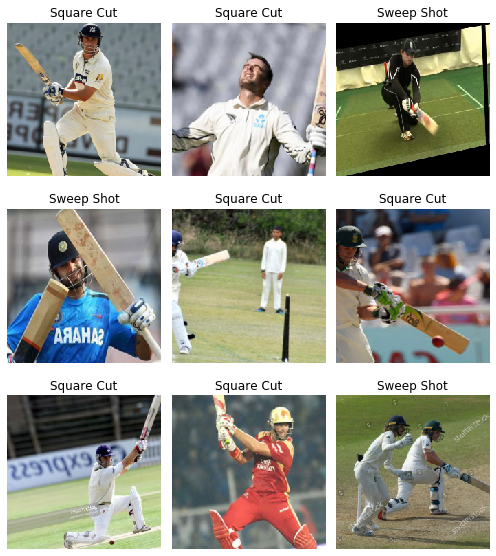

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.c, len(data.train_ds), len(data.valid_ds)

(2, 298, 74)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(10, max_lr = slice(None, .003))

epoch,train_loss,valid_loss,error_rate,time
0,1.361065,1.050532,0.500000,00:06
1,1.095661,1.152796,0.378378,00:06
2,0.913828,0.979217,0.337838,00:06
3,0.807666,0.980241,0.297297,00:06
4,0.715689,1.056834,0.324324,00:06
5,0.664079,0.972542,0.351351,00:06
6,0.615625,0.922089,0.324324,00:06
7,0.577251,0.908337,0.324324,00:06
8,0.532595,0.859424,0.337838,00:06
9,0.504240,0.844927,0.337838,00:06


In [0]:
learn.save('stg-1')

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


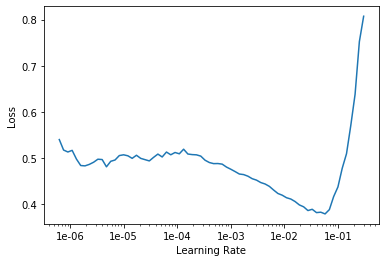

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(4, max_lr = slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.356697,0.885408,0.337838,00:07
1,0.339665,1.067501,0.324324,00:07
2,0.293022,1.076404,0.283784,00:07
3,0.251764,0.902749,0.283784,00:07


In [0]:
learn.save('stg-2')

# Data Cleaning

When using a Jupyter Notebook, use the following method to clean the datasets. Right now, Colab doesn't support widgets so I had to clean the datasets manually

In [0]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In order to clean the entire set of images, we need to create a new dataset without the split. The video lecture demostrated the use of the `ds_type` param which no longer has any effect. See [the thread](https://forums.fast.ai/t/duplicate-widget/30975/10) for more details.

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .split_none()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

Then we create a new learner to use our new databunch with all the images.

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

Make sure you're running this notebook in Jupyter Notebook, not Jupyter Lab. That is accessible via [/tree](/tree), not [/lab](/lab). Running the `ImageCleaner` widget in Jupyter Lab is [not currently supported](https://github.com/fastai/fastai/issues/1539).

In [0]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)

'No images to show :)'


If the code above does not show any GUI(contains images and buttons) rendered by widgets but only text output, that may caused by the configuration problem of ipywidgets. Try the solution in this [link](https://github.com/fastai/fastai/issues/1539#issuecomment-505999861) to solve it.


Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

Make sure to recreate the databunch and `learn_cln` from the `cleaned.csv` file. Otherwise the file would be overwritten from scratch, losing all the results from cleaning the data from toplosses.

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [0]:
ImageCleaner(ds, idxs, path, duplicates=True)

'No images to show :)'

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

# Interpretation and Data Cleaning

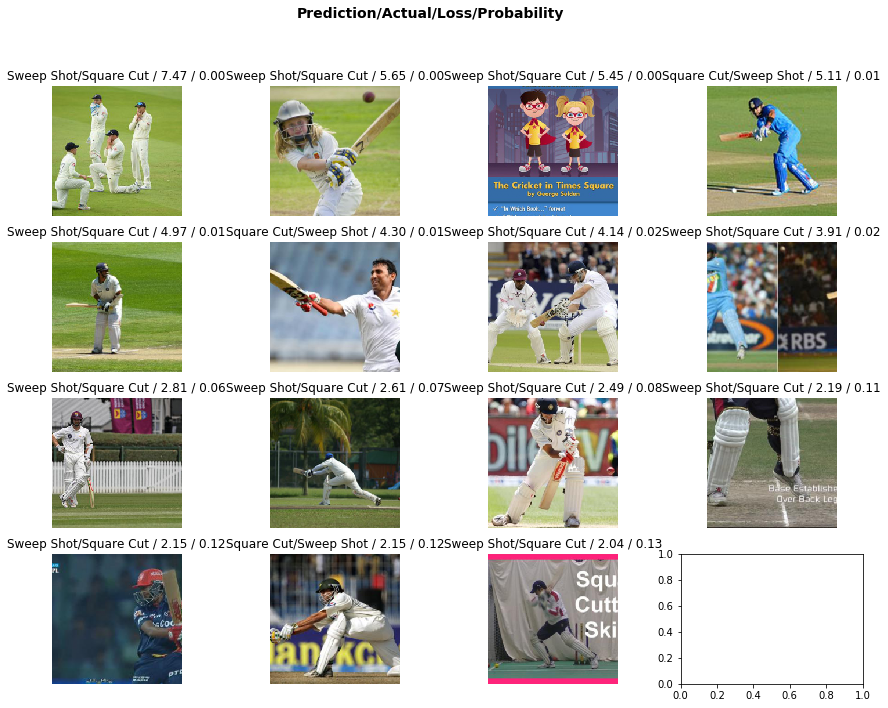

In [0]:
learn.load('stg-2')
interp1 = ClassificationInterpretation.from_learner(learn)
interp1.plot_top_losses(15, figsize=(15,11))

In [0]:
np.random.seed(42); # to choose the same validation set each time
data2 = ImageDataBunch.from_folder(path, train = ".", valid_pct=0.2, ds_tfms = get_transforms(), size = 224, num_workers=4).normalize(imagenet_stats)

In [0]:
data2.classes

['Square Cut', 'Sweep Shot']

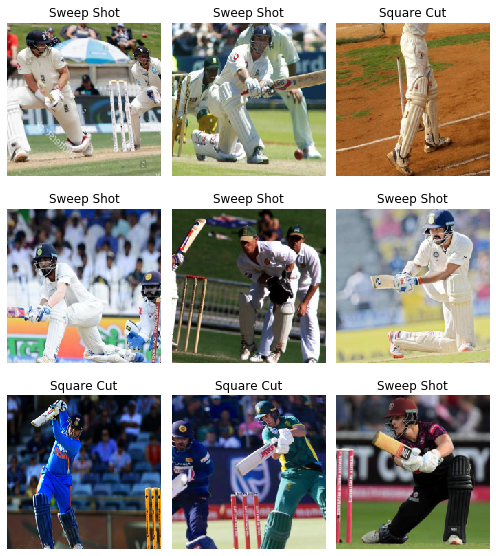

In [0]:
data2.show_batch(rows=3, figsize=(7,8))

In [0]:
data2.c, len(data2.train_ds), len(data2.valid_ds)

(2, 234, 58)

In [0]:
learn2 = cnn_learner(data2, models.resnet34, metrics=error_rate)

In [0]:
learn2.fit_one_cycle(10, max_lr = slice(None, .003))

epoch,train_loss,valid_loss,error_rate,time
0,1.262012,2.930812,0.517241,00:05
1,1.137581,1.725773,0.482759,00:05
2,0.932372,0.611588,0.275862,00:05
3,0.843945,0.524546,0.172414,00:05
4,0.737618,0.646354,0.172414,00:05
5,0.645574,0.602977,0.189655,00:05
6,0.592773,0.521492,0.137931,00:05
7,0.541671,0.508127,0.137931,00:05
8,0.508127,0.495615,0.155172,00:05
9,0.497287,0.473485,0.137931,00:05


In [0]:
learn2.save('l2-stg1')

In [0]:
learn2.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


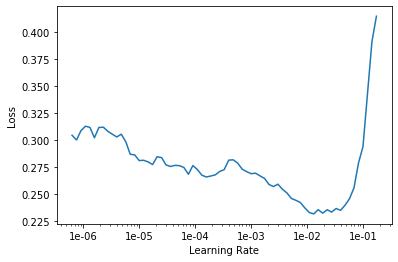

In [0]:
learn2.recorder.plot()

In [0]:
learn2.load('l2-stg1')
learn2.unfreeze()
learn2.fit_one_cycle(10, max_lr=slice(0.000045, .00045))

epoch,train_loss,valid_loss,error_rate,time
0,0.228031,0.468792,0.137931,00:05
1,0.241256,0.433858,0.155172,00:05
2,0.238526,0.582037,0.172414,00:05
3,0.227889,0.470724,0.172414,00:05
4,0.208018,0.366687,0.120690,00:05
5,0.177139,0.358130,0.103448,00:05
6,0.172458,0.345391,0.086207,00:05
7,0.155446,0.375222,0.103448,00:05
8,0.143549,0.394589,0.103448,00:05
9,0.128751,0.393641,0.103448,00:05


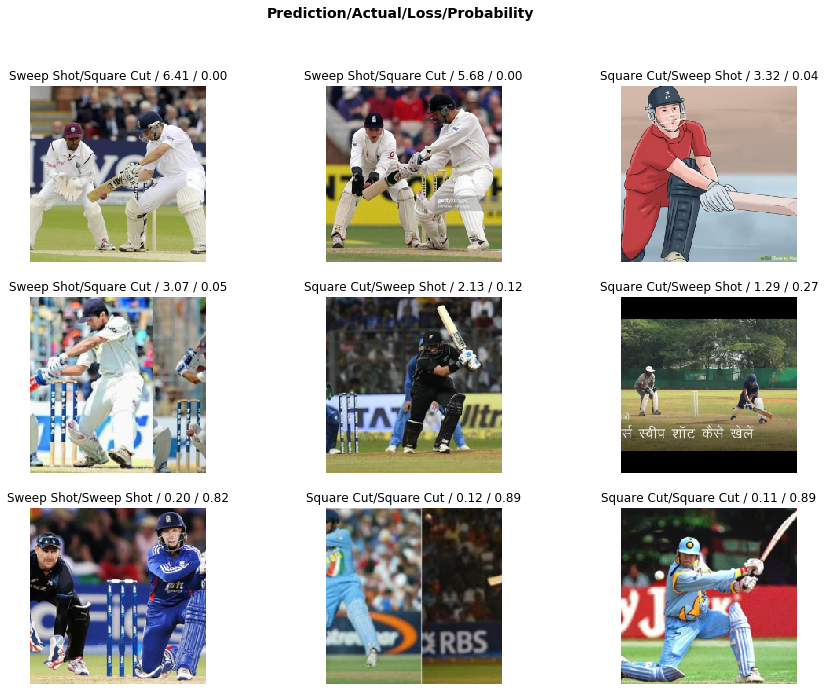

In [0]:
learn2.save('l2-stg2')
interp2 = ClassificationInterpretation.from_learner(learn2)
interp2.plot_top_losses(9, figsize=(15,11))